In [4]:
from get_airports import get_airport_popular_times, load_airports
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib notebook


In [5]:
times = (get_airport_popular_times(airport) for airport in load_airports())
times = (time for time in times if time)
popular_times = [{time["name"]: time["data"] for time in day} for day in times]

days = list(popular_times[0].keys())

print(len(min((time[days[-1]] for time in popular_times), key=len)))

24


['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


<IPython.core.display.Javascript object>


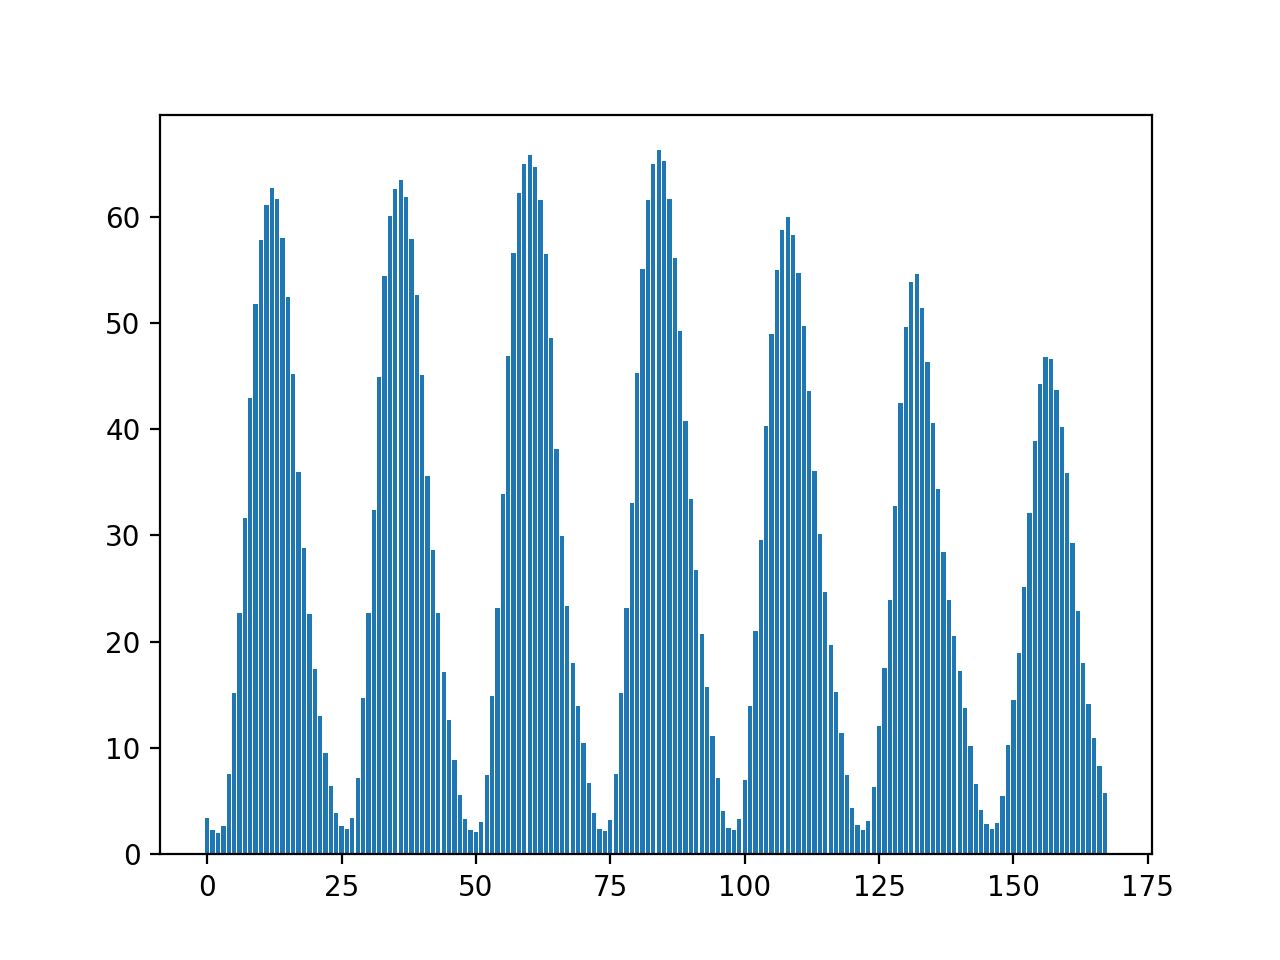

<Container object of 168 artists>

In [6]:
print(days)
times = np.array([np.array(list(itertools.chain(*[airport[day] if airport[day] else [0]*24 for day in days]))) for airport in popular_times]).mean(axis=0)
plt.bar(range(len(times)), times)